<div style="background-color:#BFBEBE; text-align: center;">
<img src="imgs/icon.png" style="width:600px">
</div>

# Start & Tools

O primeiro passo será realizar o download dos arquivos de áudio que serão utilizados nos experimentos durante as aulas.

In [ ]:
!mkdir audios
!mkdir imgs
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/image_423.jpg -o imgs/image_423.jpg

In [ ]:
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/seis.wav -o audios/seis.wav
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/simple_loop.wav -o audios/simple_loop.wav
!curl https://meriatdatasets.blob.core.windows.net/public/digital-audio-processing/image_423.jpg -o audios/image_423.jpg

In [ ]:
!ls audios

# Jupyter Audio Basics

## Audio Libraries

Nos exemplos a seguir, usaremos principalmente duas bibliotecas para aquisição e reprodução de áudio:

### 1. librosa

[`librosa`](https://librosa.github.io/librosa/index.html) é um Python package for music and audio processing criado por [Brian McFee](https://bmcfee.github.io/). Uma grande parte foi portada para o Matlab por [Dan Ellis](http://www.ee.columbia.edu/%7Edpwe/resources/matlab/).

Se necessário, a instalação da versão utilizada nesta aula é a: **`0.8.0`**. 

Para a instalação da versão **`0.7.2`**, utilize os seguintes comandos:

* `pip install librosa==0.7.2`
* `pip install numba==0.48.0`

### 2. IPython.display.Audio

[`IPython.display.Audio`](http://ipython.org/ipython-doc/stable/api/generated/IPython.display.html#IPython.display.Audio) nos permite reproduzir áudio diretamente em um notebook IPython.

## Reading Audio

Usamos a função [`librosa.load`](https://librosa.github.io/librosa/generated/librosa.core.load.html#librosa.core.load) para carregar um arquivo de áudio em uma matriz de áudio. Retorne a matriz de áudio e a taxa de amostragem (sample rate):

In [1]:
import librosa

print(librosa.__version__)

0.10.2.post1


In [2]:
x, sr = librosa.load('audios/seis.wav')

> Caso você receba um erro durante o `librosa.load`, garanta que o [ffmpeg](https://librosa.github.io/librosa/install.html#ffmpeg) esteja instalado.

Exibindo o comprimento da matriz de áudio e a taxa de amostragem:

In [3]:
print(x.shape)

print(sr)

(26546,)
22050


## Visualizing Audio

In [4]:
#%matplotlib inline
import matplotlib.pyplot as plt
#import librosa.display

Plot do audio array com [`librosa.display.waveplot`](https://librosa.github.io/librosa/generated/librosa.display.waveplot.html#librosa.display.waveplot):

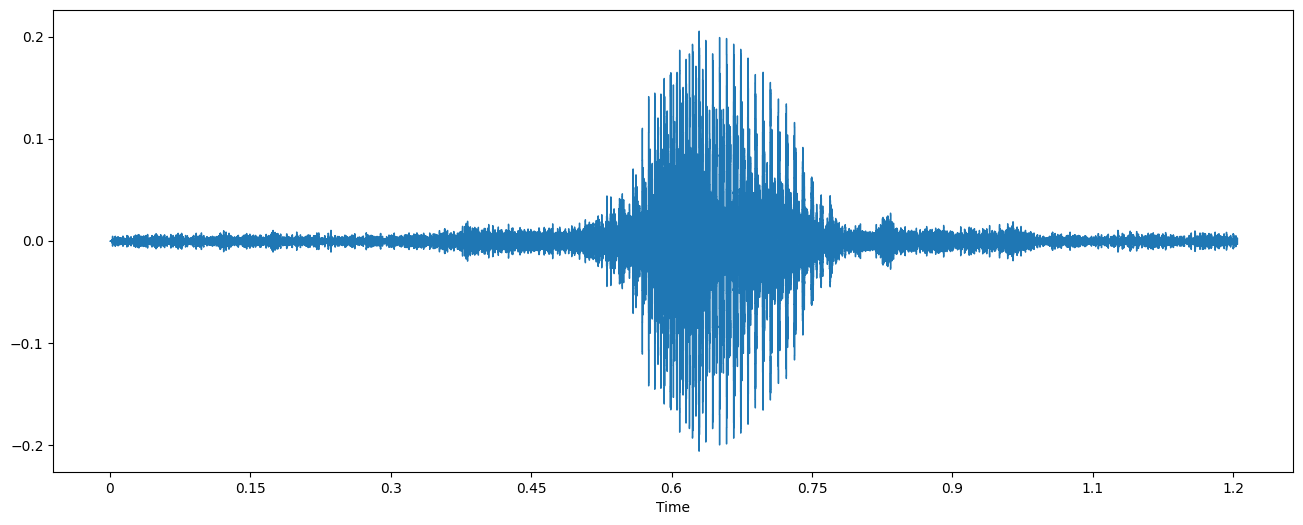

In [5]:
plt.figure(figsize=(16, 6))
librosa.display.waveshow(x, sr=sr)
#librosa.display.waveplot(x, sr=sr)
plt.show()

Plot do espectrograma com [`librosa.display.specshow`](https://librosa.github.io/librosa/generated/librosa.display.specshow.html):

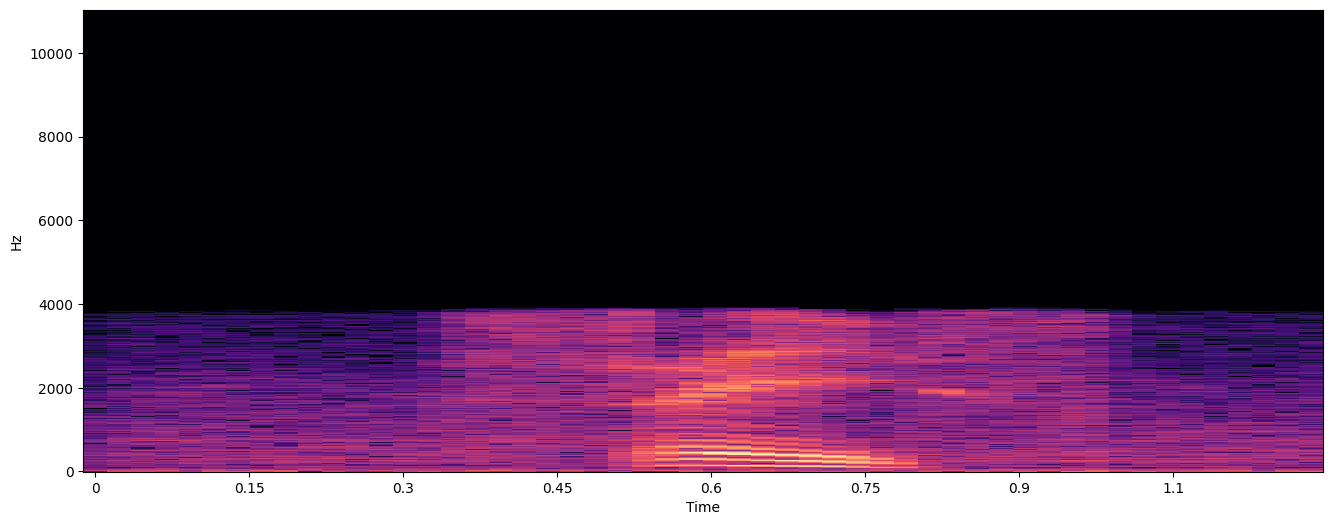

In [6]:
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))

plt.figure(figsize=(16, 6))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.show()

## Playing Audio

### `IPython.display.Audio`

Utilizamos o [`IPython.display.Audio`](http://ipython.org/ipython-doc/2/api/generated/IPython.lib.display.html#IPython.lib.display.Audio), para ouvir um determinado áudio diretamente no notebook.

In [7]:
import IPython.display as ipd

ipd.Audio('audios/seis.wav') # load a local WAV file

A função `IPython.display.Audio` traduz qualquer matriz, como por exemplo uma matriz NumPy. Vamos sintetizar um tom puro em 440 Hz:

In [8]:
import numpy

# sample rate
sr = 22050
# seconds
T = 2.0
# time variable
t = numpy.linspace(0, T, int(T*sr), endpoint=False)
# pure sine wave at 440 Hz
x = 0.5*numpy.sin(2*numpy.pi*440*t)

Ouvindo o áudio recém criado

In [9]:
# load a NumPy array
ipd.Audio(x, rate=sr)

## Writing Audio

Use a funcão [`librosa.output.write_wav`](https://librosa.github.io/librosa/generated/librosa.output.write_wav.html#librosa.output.write_wav) para salvar o array NumPy em um arquivo WAV. **Este comando só está disponível para a versão `0.7.2`**

In [10]:
import soundfile as sf

In [11]:
sf.write('audios/tone_440.wav', x, sr, 'PCM_16')

## ffmpeg & ffprobe

[ffmpeg](https://www.ffmpeg.org/) is a framework to convert among different audio and video file formats.

In [12]:
!ffmpeg -version

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-l

In [13]:
!ffprobe -version

ffprobe version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2007-2021 the FFmpeg developers
built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-

In [14]:
!ffmpeg -encoders

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [15]:
!ffprobe -i 'audios/seis.wav' -show_streams

ffprobe version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2007-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --ena

In [16]:
!ffprobe -i 'audios/simple_loop.wav' -print_format 'json' -show_streams

ffprobe version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2007-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --ena